<a id="title"></a>
# **Exploratory Data Analysis on exoplanets**  

The study of exoplanets is one of the most exciting fields of research in modern astrophysics. Every year a multitude of lenses focus outside our planet and find distant objects, so distant that it would take years of travelling at the speed of light to touch them. Despite this distance, we are still able to see them (in their past :C), study them and even compare them with our world.

In this Exploratory Data Analysis we will observe the 5523 exoplanets recognised by NASA's Exoplanet Institute as of 2 October 2023.
For the geolocation of the discovering observatories we will make use of the Python client geopy, a popular geocoding web service.

The ESI (Earth Similarity Index) exoplanet data are selected by the Planetary Habitability Laboratory, University of Arecibo (Puerto Rico) from the above mentioned dataset.

### **Table of contents**
* [ Data preprocessing ](#section1)
* [ Discovery methods ](#section2)
* [ Discovery facilities  ](#section3)
* [ Location of observatories ](#section4)
    - [Discoveries from space](#subsection4.1)
    - [Discoveries from ground](#subsection4.2)
    - [Facilities geolocation](#subsection4.3)
* [ Discoveries through time ](#section5)  
* [ Conclusion ](#section8)
* [ References ](#section9)

<a id="section1"></a>
##  **Data preprocessing**  

Retrieved from NASA Exoplanet Archive operated by the California Institute of Technology, under contract to the National Aeronautics and Space Administration under the Exoplanet Exploration Program [**⁽¹⁾**](#section9)


Selected parameters:

**General**
* Name
* Number of stars, planets and moons recognised in system
* Method of discovery
* Year of discovery
* Discovery entity
* Location of entity (Earth, space or both)

**Characteristics**
* Orbital period
* Mass (in Earths) (best estimation)
* Radius (in Earths)
* Density
* Equilibrium temperature
* Insolatium flux

**Positioning**
* Right ascension
* Declination
* Distance

##### Read dataset 

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('/kaggle/input/nasa-exoplanet-archive/PS_2023.08.02_06.28.52.csv', sep=',')
data.head()

,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,...,sy_kepmagerr2,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec;;;;;;
0,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,1,...,NaN,2014-05-14,2008-01,2014-05-14,2,1,2,0,0,0;;;;;;
1,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,1,1,1,...,NaN,2018-09-04,2017-03,2018-09-06,0,1,1,0,0,0;;;;;;
2,14 And b,14 And,b,HD 221345,HIP 116076,TIC 333225860,Gaia DR2 1920113512486282240,1,1,1,...,NaN,2014-05-14,2008-12,2014-05-14,0,1,1,0,0,0;;;;;;
3,14 Her b,14 Her,b,HD 145675,HIP 79248,TIC 219483057,Gaia DR2 1385293808145621504,1,1,2,...,NaN,2023-06-12,2022-09,2023-06-12,0,1,4,1,0,0;;;;;;
4,16 Cyg B b,16 Cyg B,b,HD 186427,HIP 96901,TIC 27533327,Gaia DR2 2135550755683407232,1,3,1,...,NaN,2018-09-04,2017-03,2018-09-06,5,1,4,3,0,0;;;;;;


##### Filter dataset by features

In [3]:
features = ['pl_name', 'sy_snum', 'sy_pnum', 'sy_mnum', 'discoverymethod', 'disc_year', 'disc_facility', 'disc_locale', 'pl_orbper',
               'pl_bmasse', 'pl_rade', 'pl_dens', 'pl_eqt', 'pl_insol','rastr','decstr', 'sy_dist', 'st_teff']

df = data[features]
df

,pl_name,sy_snum,sy_pnum,sy_mnum,discoverymethod,disc_year,disc_facility,disc_locale,pl_orbper,pl_bmasse,pl_rade,pl_dens,pl_eqt,pl_insol,rastr,decstr,sy_dist,st_teff
0,11 Com b,2,1,0,Radial Velocity,2007,Xinglong Station,Ground,326.030000,6165.60000,NaN,NaN,NaN,NaN,12h20m42.91s,+17d47m35.71s,93.1846,4742.0
1,11 UMi b,1,1,0,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,Ground,516.219970,4684.81420,NaN,NaN,NaN,NaN,15h17m05.90s,+71d49m26.19s,125.3210,4213.0
2,14 And b,1,1,0,Radial Velocity,2008,Okayama Astrophysical Observatory,Ground,185.840000,1525.50000,NaN,NaN,NaN,NaN,23h31m17.80s,+39d14m09.01s,75.4392,4813.0
3,14 Her b,1,2,0,Radial Velocity,2002,W. M. Keck Observatory,Ground,1765.038900,2559.47216,NaN,NaN,NaN,NaN,16h10m24.50s,+43d48m58.90s,17.9323,NaN
4,16 Cyg B b,3,1,0,Radial Velocity,1996,Multiple Observatories,Ground,798.500000,565.73740,NaN,NaN,NaN,NaN,19h41m51.75s,+50d31m00.57s,21.1397,5750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5408,ups And b,2,3,0,Radial Velocity,1996,Lick Observatory,Ground,4.617033,218.53100,NaN,NaN,NaN,NaN,01h36m47.60s,+41d24m13.73s,13.4054,NaN
5409,ups And c,2,3,0,Radial Velocity,1999,Multiple Observatories,Ground,241.258000,629.59500,NaN,NaN,NaN,NaN,01h36m47.60s,+41d24m13.73s,13.4054,NaN
5410,ups And d,2,3,0,Radial Velocity,1999,Multiple Observatories,Ground,1276.460000,1313.22000,NaN,NaN,NaN,NaN,01h36m47.60s,+41d24m13.73s,13.4054,NaN
5411,ups Leo b,1,1,0,Radial Velocity,2021,Okayama Astrophysical Observatory,Ground,385.200000,162.09249,NaN,NaN,NaN,NaN,11h36m56.93s,-00d49m24.83s,52.5973,4836.0


##### Missing values

In [4]:
print(f"Missing values:\n {df.isnull().sum()}\n")
print(f"Total: {df.isnull().sum().values.sum()} \n")

Missing values:
 pl_name               0
sy_snum               0
sy_pnum               0
sy_mnum               0
discoverymethod       0
disc_year             0
disc_facility         0
disc_locale           0
pl_orbper           244
pl_bmasse          2964
pl_rade            1337
pl_dens            4574
pl_eqt             4269
pl_insol           4834
rastr                 0
decstr                0
sy_dist             118
st_teff             598
dtype: int64

Total: 18938 



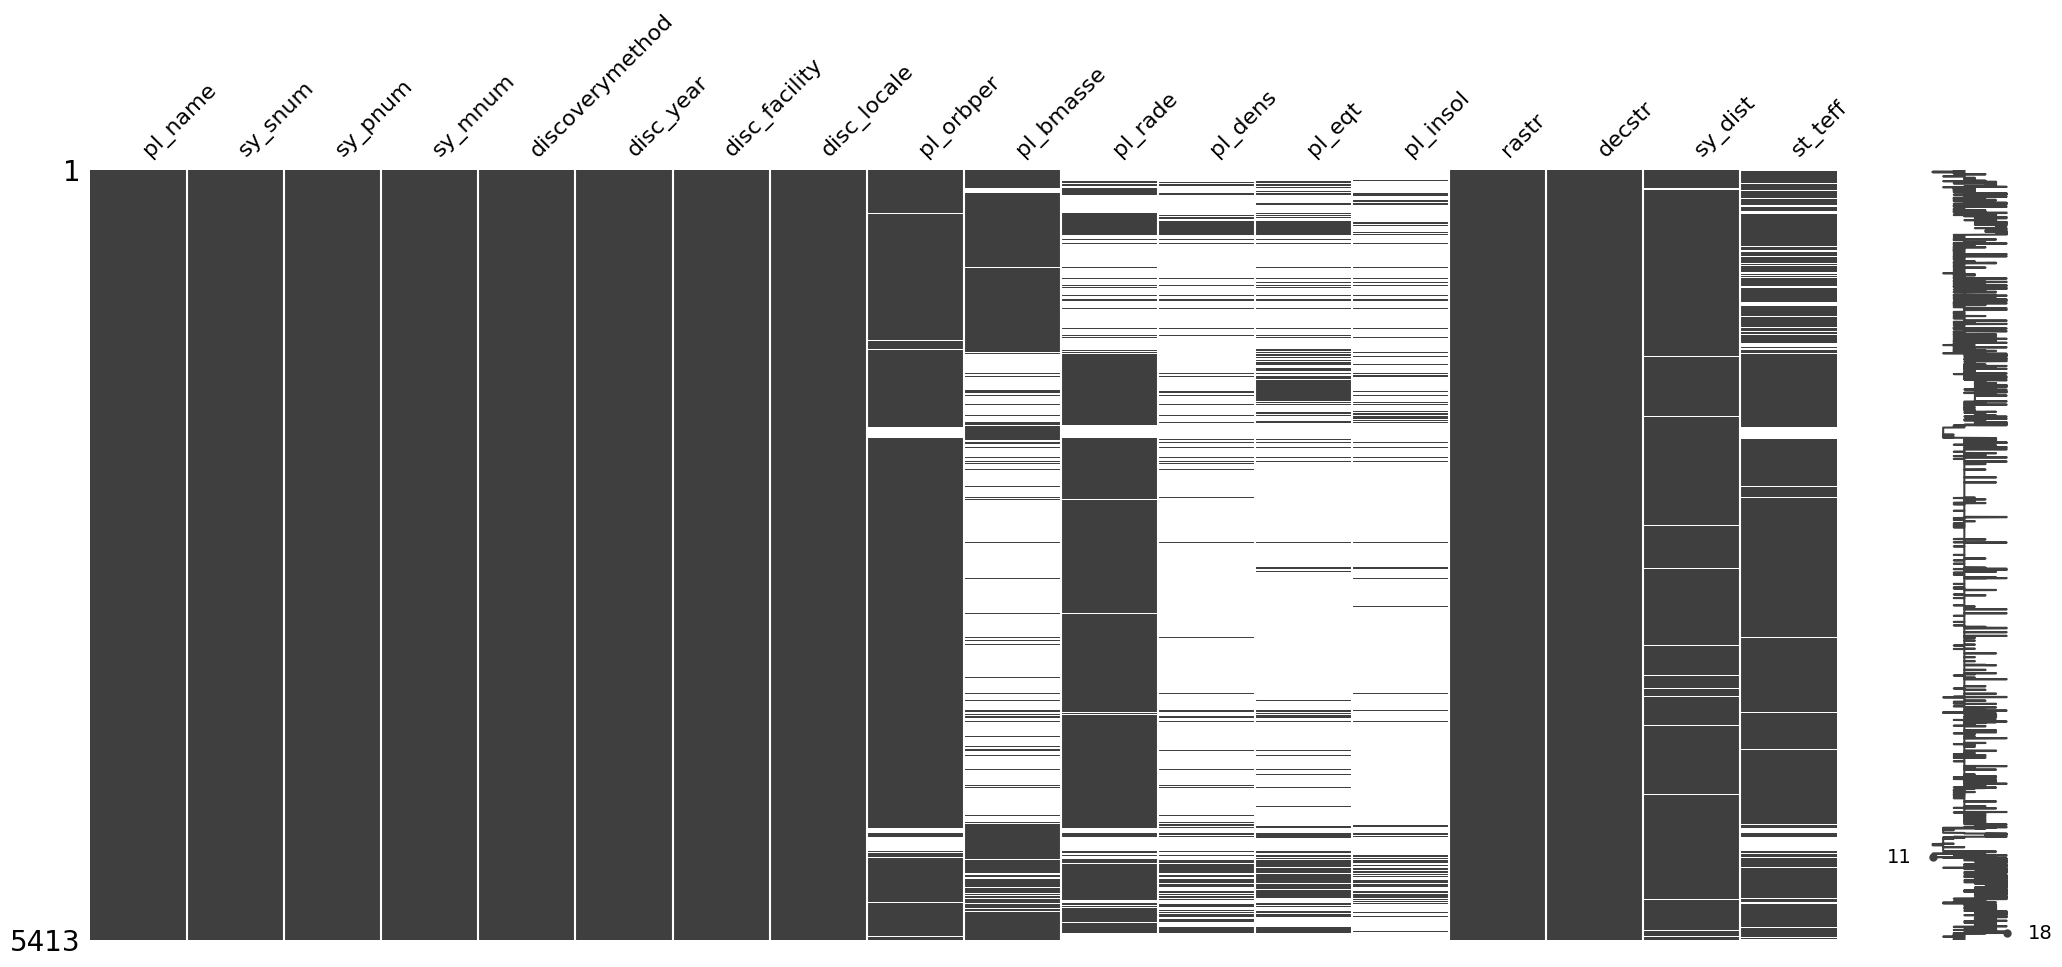

In [5]:
import missingno as msno

msno.matrix(df);

##### Convert Multiple Locale a Multiple locales

In [6]:
df['disc_locale'].unique()

array(['Ground', 'Space', 'Multiple Locales', 'Multiple Locale'],
      dtype=object)

In [7]:
df.loc[df.disc_locale == "Multiple Locale", "disc_locale"] = "Multiple Locales"

<a id="section2"></a>
## **Discovery methods**


#### Analysis by the techniques used for the discovery of the exoplanets.

In [8]:
df_dis = df.groupby(by=["discoverymethod"]).size().reset_index(name="counts")
df_dis

,discoverymethod,counts
0,Astrometry,2
1,Disk Kinematics,1
2,Eclipse Timing Variations,17
3,Imaging,68
4,Microlensing,201
5,Orbital Brightness Modulation,9
6,Pulsar Timing,7
7,Pulsation Timing Variations,2
8,Radial Velocity,1048
9,Transit,4034


In [9]:
df_dis = df_dis.sort_values('counts', ascending = True)

In [10]:
import plotly.express as px

fig = px.bar(df_dis, y='discoverymethod', x='counts', text_auto='auto', color_discrete_sequence=px.colors.sequential.thermal[1:])
fig.update_layout(template="plotly_white", title_text='Exoplanets by method of discovery', title_x=0.5)

fig.show()

 We observe how Transit detection is the most widely used, being observed changes in brightness caused by the passage of the planet in front of its star. In addition to its discovery it also allows to recognise a great variety of different characteristics like the size of the exoplanet's orbit, that can be calculated from how long it takes to orbit once (the period), and the size of the planet itself can be calculated based on how much the star's brightness lowered.

Even they can determine the atmosphere during a transit. Some of the light will pass through its atmosphere and that light can be analysed to determine which different atmospheric elements influenced its particular scattering. [**⁽²⁾**](#section9)

![](https://exoplanets.nasa.gov/rails/active_storage/blobs/eyJfcmFpbHMiOnsibWVzc2FnZSI6IkJBaHBBajBNIiwiZXhwIjpudWxsLCJwdXIiOiJibG9iX2lkIn19--c103b7858d358b954674f60aeedf8e5ba479e4bb/656348main_ToV_transit_diag.jpg)

<a id="section3"></a>
## **Discovery facilities**

#### Now we will focus the analysis on the observatories (if located on the ground) or telescopes (discovered from space) that managed to score on the list of exoplanets.

In [11]:
df_fac = df.groupby(by=["disc_facility", "disc_locale"]).size().reset_index(name="counts")
df_fac = df_fac.sort_values('counts', ascending = False)
df_fac

,disc_facility,disc_locale,counts
27,Kepler,Space,2708
21,K2,Space,548
63,Transiting Exoplanet Survey Satellite (TESS),Space,372
29,La Silla Observatory,Ground,276
41,Multiple Observatories,Ground,264
...,...,...,...
59,Teide Observatory,Ground,1
32,Leoncito Astronomical Complex,Ground,1
44,NASA Infrared Telescope Facility (IRTF),Ground,1
53,SPECULOOS Southern Observatory,Ground,1


In [12]:
print(df_fac.nunique())

disc_facility    70
disc_locale       3
counts           33
dtype: int64


##### We found duplicate entities, as they were discovered in different locations at same time (Space, Ground or Multiple)

In [13]:
duplicated = df_fac[df_fac.duplicated('disc_facility')]

for index, row in duplicated.iterrows():
  print(df_fac.loc[df_fac['disc_facility'] == row['disc_facility']])
  print()

             disc_facility       disc_locale  counts
41  Multiple Observatories            Ground     264
42  Multiple Observatories  Multiple Locales      14
43  Multiple Observatories             Space       3

          disc_facility       disc_locale  counts
39  Multiple Facilities            Ground      15
40  Multiple Facilities  Multiple Locales       3

             disc_facility       disc_locale  counts
41  Multiple Observatories            Ground     264
42  Multiple Observatories  Multiple Locales      14
43  Multiple Observatories             Space       3

                                   disc_facility disc_locale  counts
63  Transiting Exoplanet Survey Satellite (TESS)       Space     372
62  Transiting Exoplanet Survey Satellite (TESS)      Ground       1



In [14]:
import plotly.express as px

fig = px.bar(df_fac, y='disc_facility', x='counts', text_auto='auto',
             height=1700, color='disc_locale',  color_discrete_sequence=px.colors.sequential.thermal[1:])
fig.update_layout(yaxis = {"categoryorder":"total ascending"})
fig.update_layout(template="plotly_white", title_text='Number of exoplanets per detector', title_x=0.5)
fig.update_yaxes(title=None)

fig.show()

 Since the 1990s, NASA's Kepler space telescope has identified thousands of planets orbiting other stars. The telescope observed 150,000 stars with potential planets, monitoring for light decreases.

After the pointing control failed, the mission was renamed K2, and it continued to hunt for exoplanets. The mission ended in 2018, but its data continues to provide valuable information about planets in our galactic neighborhood.[**⁽³⁾**](#section9)

![](https://i.postimg.cc/NfqchHbD/Captura-de-pantalla-2023-10-03-203549.png)

<a id="section4"></a>
## **Location of observatories** 

#### As we have visualised above, more exoplanets were discovered from space than from the ground. Thus, we will analyse the two locations separately.

In [15]:
df_facloc = df.groupby(by=["disc_locale"]).size().reset_index(name="counts")
df_facloc = df_facloc.sort_values('counts', ascending = False)
df_facloc

,disc_locale,counts
2,Space,3683
0,Ground,1712
1,Multiple Locales,18


In [16]:
import plotly.express as px
fig = px.pie(df_facloc, values='counts', names='disc_locale', color_discrete_sequence=px.colors.sequential.thermal[1:])
fig.update_layout(title_text='Discovery locations (%)', title_x=0.5)
fig.update_traces(marker=dict(line=dict(color='white', width=1)))

fig.show()

##### Differentiate between space and ground installations

In [17]:
df_facground = df_fac.loc[df_fac['disc_locale'] == 'Ground']

df_facspace = df_fac.loc[df_fac['disc_locale'] == 'Space']


<a id="subsection4.1"></a>
### **Discoveries from space**

In [18]:
df_facspace

,disc_facility,disc_locale,counts
27,Kepler,Space,2708
21,K2,Space,548
63,Transiting Exoplanet Survey Satellite (TESS),Space,372
9,CoRoT,Space,35
18,Hubble Space Telescope,Space,6
54,Spitzer Space Telescope,Space,4
43,Multiple Observatories,Space,3
6,CHaracterising ExOPlanets Satellite (CHEOPS),Space,3
11,European Space Agency (ESA) Gaia Satellite,Space,2
69,Wide-field Infrared Survey Explorer (WISE) Sat,Space,1


In [19]:
print(df_facspace.nunique())

disc_facility    11
disc_locale       1
counts            9
dtype: int64


In [20]:
df_facspace = df_facspace.sort_values('counts', ascending = True)

In [21]:
import plotly.express as px

fig = px.bar(df_facspace, y='disc_facility', x='counts', text_auto='auto',
           color_discrete_sequence=px.colors.sequential.thermal[1:])
fig.update_layout(template="plotly_white", title_text='Number of exoplanets detected from space', title_x=0.5)

fig.show()

 Following Kepler's missions is its sucessor, the Transiting Exoplanet Survey Satellite (TESS) telescope, launched in 2018 to discover small planets through Transit method.

During its two-year primary mission, TESS monitored more than 200,000 pre-selected stars and detected more than 1,900 exoplanet candidates.[**⁽⁴⁾**](#section9)

![](https://i.postimg.cc/Z5SC363b/Captura-de-pantalla-2023-10-03-203630.png)

<a id="subsection4.2"></a>
### **Discoveries from ground**

In [22]:
df_facground

,disc_facility,disc_locale,counts
29,La Silla Observatory,Ground,276
41,Multiple Observatories,Ground,264
67,W. M. Keck Observatory,Ground,184
56,SuperWASP,Ground,113
46,OGLE,Ground,97
25,KMTNet,Ground,79
15,HATSouth,Ground,73
14,HATNet,Ground,67
17,Haute-Provence Observatory,Ground,64
49,Paranal Observatory,Ground,44


In [23]:
print(df_facground.nunique())

disc_facility    60
disc_locale       1
counts           29
dtype: int64


In [24]:
df_facground = df_facground.sort_values('counts', ascending = True)

In [25]:
import plotly.express as px

fig = px.bar(df_facground, y='disc_facility', x='counts', text_auto='auto',
             color_discrete_sequence=px.colors.sequential.thermal[2:], height=1500)
fig.update_layout(template="plotly_white", title_text='Number of exoplanets detected from the ground', title_x=0.5)
fig.update_yaxes(title=None)

fig.show()

 Founded in 1969, La Silla Observatory on the edge of Chile's Atacama Desert has the most confirmed exoplanets on the books, with 276, outperforming even multi-observatory organisations.

ESO operates two of the world's most productive four-metre optical telescopes there and, with nearly 300 publications per year with citations attributable to the observatory's work, La Silla continues to be at the forefront of astronomy.[**⁽⁵⁾**](#section9)

![](https://i.postimg.cc/FFfrXmvr/Captura-de-pantalla-2023-10-03-220337.png)

<a id="subsection4.3"></a>
### **Facilities geolocation**

#### We will now geolocate and visualise the observatories on a map of the world.

##### 🔧 In order to localize observatories we use geopy, a Python client for several popular geocoding web services.[**⁽⁶⁾**](#section9)

In [26]:
!pip install geopy

In [27]:
from geopy.geocoders import Nominatim

geolocator = Nominatim(timeout=10, user_agent = "Geolocator")

latitude = []
longitude = []

for index, loc in df_facground.iterrows():
  if (geolocator.geocode(loc['disc_facility'])):
    location = geolocator.geocode(loc['disc_facility'])
    latitude.append(location.latitude)
    longitude.append(location.longitude)
  else:
    # Si no son encontrados se asignan NaN
    latitude.append(pd.NA)
    longitude.append(pd.NA)

df_facground['latitude'] = latitude
df_facground['longitude'] = longitude

In [28]:
df_facground

,disc_facility,disc_locale,counts,latitude,longitude
37,Mauna Kea Observatory,Ground,1,19.824758,-155.473356
65,University of Canterbury Mt John Observatory,Ground,1,<NA>,<NA>
2,Apache Point Observatory,Ground,1,32.780298,-105.819909
4,Atacama Large Millimeter Array (ALMA),Ground,1,-23.016605,-67.772269
70,Winer Observatory,Ground,1,<NA>,<NA>
66,Very Long Baseline Array,Ground,1,35.775135,-106.245559
53,SPECULOOS Southern Observatory,Ground,1,<NA>,<NA>
19,Infrared Survey Facility,Ground,1,-32.380287,20.809872
28,Kitt Peak National Observatory,Ground,1,31.96005,-111.598063
59,Teide Observatory,Ground,1,28.301554,-16.509884


##### We found observatories whose location could not be completed.

In [29]:
df_facground.loc[df_facground['latitude'].isnull()]

,disc_facility,disc_locale,counts,latitude,longitude
65,University of Canterbury Mt John Observatory,Ground,1,<NA>,<NA>
70,Winer Observatory,Ground,1,<NA>,<NA>
53,SPECULOOS Southern Observatory,Ground,1,<NA>,<NA>
32,Leoncito Astronomical Complex,Ground,1,<NA>,<NA>
62,Transiting Exoplanet Survey Satellite (TESS),Ground,1,<NA>,<NA>
64,United Kingdom Infrared Telescope,Ground,2,<NA>,<NA>
0,Acton Sky Portal Observatory,Ground,2,<NA>,<NA>
39,Multiple Facilities,Ground,15,<NA>,<NA>
5,Bohyunsan Optical Astronomical Observatory,Ground,23,<NA>,<NA>
47,Okayama Astrophysical Observatory,Ground,35,<NA>,<NA>


##### Completing locations manually

In [30]:
df_facground.loc[df_facground.disc_facility == "Bohyunsan Optical Astronomical Observatory", "latitude"] = 36.16493673022682
df_facground.loc[df_facground.disc_facility == "Bohyunsan Optical Astronomical Observatory", "longitude"] = 128.97680621520124

df_facground.loc[df_facground.disc_facility == "Haute-Provence Observatory", "latitude"] = 43.93465290685473
df_facground.loc[df_facground.disc_facility == "Haute-Provence Observatory", "longitude"] =5.711210002635074

df_facground.loc[df_facground.disc_facility == "Okayama Astrophysical Observatory", "latitude"] = 34.57620737464398
df_facground.loc[df_facground.disc_facility == "Okayama Astrophysical Observatory", "longitude"] = 133.59468610715888

df_facground.loc[df_facground.disc_facility == "United Kingdom Infrared Telescope", "latitude"] = 19.82263133941441
df_facground.loc[df_facground.disc_facility == "United Kingdom Infrared Telescope", "longitude"] = -155.4702713396269

# Amateur astronomer Paul Benni and researcher Artem Burdanov (MIT)
df_facground.loc[df_facground.disc_facility == "Acton Sky Portal Observatory", "latitude"] = 42.4850931
df_facground.loc[df_facground.disc_facility == "Acton Sky Portal Observatory", "longitude"] = -71.43284

df_facground.loc[df_facground.disc_facility == "University of Canterbury Mt John Observatory", "latitude"] = -43.985079510206
df_facground.loc[df_facground.disc_facility == "University of Canterbury Mt John Observatory", "longitude"] = 170.46406802137483

df_facground.loc[df_facground.disc_facility == "Winer Observatory", "latitude"] = 31.66664384843098
df_facground.loc[df_facground.disc_facility == "Winer Observatory", "longitude"] = -110.60167156843839

df_facground.loc[df_facground.disc_facility == "Infrared Survey Facility", "latitude"] = -32.40945838829719
df_facground.loc[df_facground.disc_facility == "Infrared Survey Facility", "longitude"] = 20.800649558809692

df_facground.loc[df_facground.disc_facility == "Leoncito Astronomical Complex", "latitude"] = -31.798406322237792
df_facground.loc[df_facground.disc_facility== "Leoncito Astronomical Complex", "longitude"] = -69.29561017690845


🔎 In this research we highlight the exploration of two amateur astronomers, Paul Benni and Artem Burdanov, who is also a researcher at MIT. They managed to detect two confirmed exoplanets (GPX-1 b, 2021) (KPS-1 b, 2018) from the garden of Benni's residence in Massachusetts.[**⁽⁷⁾**](#section9)

https://skyandtelescope.org/astronomy-news/first-discoveries-pro-am-exoplanet-survey/

![](https://i.postimg.cc/pXNTbKsf/Captura-de-pantalla-2023-10-03-215441.png)

##### Remove unlocated observatories, they are multiple observatories.

In [31]:
df_facground.loc[df_facground['latitude'].isnull()]

,disc_facility,disc_locale,counts,latitude,longitude
53,SPECULOOS Southern Observatory,Ground,1,<NA>,<NA>
62,Transiting Exoplanet Survey Satellite (TESS),Ground,1,<NA>,<NA>
39,Multiple Facilities,Ground,15,<NA>,<NA>
15,HATSouth,Ground,73,<NA>,<NA>
41,Multiple Observatories,Ground,264,<NA>,<NA>


In [32]:
df_facground.dropna(inplace=True)

##### Convert location data to float

In [33]:
df_facground.dtypes

df_facground['latitude'] = df_facground['latitude'].astype(float)
df_facground['longitude'] = df_facground['longitude'].astype(float)

##### Visualize in world map

In [34]:
fig = px.scatter_geo(df_facground, lat='latitude', lon='longitude', color='counts',
                     hover_name='disc_facility', size='counts', size_max=50)
fig.update_geos(
    visible=False,
    showcountries=True, countrycolor="darkGray",
)
fig.update_layout(title_text='Exoplanet discoveries by ground-based facilities', title_x=0.5)

fig.show()

<a id="section5"></a>
## **Discoveries through time**

#### Analysis of the detections according to the year in which they were made.

In [35]:
df_year = df.groupby(by=["disc_year"]).size().reset_index(name="counts")
df_year = df_year.sort_values('disc_year', ascending = True)
df_year


,disc_year,counts
0,1992,2
1,1994,1
2,1995,1
3,1996,6
4,1997,1
5,1998,6
6,1999,13
7,2000,16
8,2001,12
9,2002,29


In [36]:
import plotly.express as px

fig = px.bar(df_year, x='disc_year', y='counts', color_discrete_sequence=px.colors.sequential.thermal[2:], text_auto="auto")
fig.update_layout(template="plotly_white", title='Exoplanets detected every year', title_x=0.5)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=True)

fig.show()

##### Getting a cumulative sum

In [37]:
df_year["total"]  = df_year["counts"].cumsum()

In [38]:
import plotly.express as px

fig = px.bar(df_year, x='disc_year', y='total', color_discrete_sequence=px.colors.sequential.thermal[2:], text_auto="auto")
fig.update_layout(template="plotly_white", title='Exoplanetas totales detectados al finalizar año', title_x=0.5)
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=True)

fig.show()

##### Count of exoplanets detected by observatories

In [39]:
df_facyear = df.groupby(by=["disc_year", "disc_facility"]).size().reset_index(name="counts")
df_facyear = df_facyear.sort_values('disc_year', ascending = False)

df_facyear['disc_locale'] = " "

for index, fac in df_facyear.iterrows():
  for index2, facility in df.iterrows():
    if fac['disc_facility'] == facility['disc_facility']:
      df_facyear.loc[df_facyear.disc_facility == facility['disc_facility'], "disc_locale"] = facility['disc_locale']

df_facyear = df_facyear.loc[df_facyear['disc_locale'] == 'Ground']

##### Delete null values

In [40]:
df_facyear.dropna(inplace=True)

##### Adding 0 in years where they were not found by observatories, to make a cumulative visualization.

In [41]:
for i in range(1992,2024):
  for index2, fila in df_facyear.iterrows():
    if ((df_facyear['disc_year'] == i) & (df_facyear['disc_facility'] == fila['disc_facility'])).any():
      continue
    else:
      my_dict = {'disc_year': i,'disc_facility': fila['disc_facility'], 'counts': 0}
      df1 = pd.DataFrame([my_dict])
      df_facyear = pd.concat([df_facyear, df1])

In [42]:
df_facyear

,disc_year,disc_facility,counts,disc_locale
424,2023,WASP-South,1,Ground
416,2023,Multiple Facilities,4,Ground
408,2023,Bohyunsan Optical Astronomical Observatory,1,Ground
409,2023,Calar Alto Observatory,1,Ground
412,2023,KMTNet,14,Ground
...,...,...,...,...
0,2023,Thueringer Landessternwarte Tautenburg,0,NaN
0,2023,Xinglong Station,0,NaN
0,2023,Teide Observatory,0,NaN
0,2023,Kitt Peak National Observatory,0,NaN


##### Cummulative sum

In [43]:
df_facyear = df_facyear.groupby(by=['disc_facility','disc_year']).sum(numeric_only=True).groupby(level=[0]).cumsum()
df_facyear = df_facyear.reset_index()

##### Adding geolocation values

In [44]:
for index, fac in df_facyear.iterrows():
  for index2, location in df_facground.iterrows():
    if fac['disc_facility'] == location['disc_facility']:
      df_facyear.loc[df_facyear.disc_facility == location['disc_facility'], "latitude"] = location['latitude']
      df_facyear.loc[df_facyear.disc_facility == location['disc_facility'], "longitude"] = location['longitude']

In [45]:
df_facyear = df_facyear.sort_values('disc_year', ascending = True)

In [46]:
fig = px.scatter_geo(df_facyear, lat='latitude', lon='longitude', color='counts',
                     hover_name='disc_facility', size='counts', size_max=50, animation_group="disc_facility", animation_frame="disc_year",
                     )
fig.update_geos(
    visible=False,
    showcountries=True, countrycolor="darkGray",
)
fig.update_layout(
    width=1200,
    height=650,
    title_text='Exoplanet discoveries by ground-based facilities over time', title_x=0.5,

)

fig.show()

<a id="section8"></a>
## **Conclusion** 

In this Exoplatory Data Analysis on exoplanets we have inmmersed ourself into a very passionate topic that is the exploration of our universe, 

*  Through the study of the discovery methods that instruments used to perform this task, we have seen that transit discoveries are the most frequent and how it works.
*  In the search for discovering entities we noticed that most of them are from space, with Kepler Telescope leading the list by far.
*  Looking deeper into the locations, we saw how La Silla Observatory is the most productive from the ground.
*  We performed a temporal visualization of the discoveries on the geolocations of terrestrial observatories.


<a id="section9"></a>
##  **References** 

* (1) NASA Exoplanet Archive *(https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS&constraint=default_flag%20%3E0)*

* (2) Exoplanet Exploration NASA *(https://exoplanets.nasa.gov/faq/31/whats-a-transit/)*
* (3) Center for Astrophysics Hardvard & Smithsonian *(https://www.cfa.harvard.edu/facilities-technology/telescopes-instruments/keplerk2)*
* (4) Exoplanet Exploration NASA *(https://exoplanets.nasa.gov/resources/2290/el-telescopio-espacial-tess/)*
* (5) European Southern Obsevatories *(https://www.eso.org/public/spain/teles-instr/lasilla/)*
* (6) Geopy *(https://github.com/geopy/geopy)*
* (7) Sky & Telescope: The Essential Guide to Astronomy* (https://skyandtelescope.org/astronomy-news/first-discoveries-pro-am-exoplanet-survey/)*